In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'lightgrey'

## EPS

Múltiplio financiero que nos indica el beneficio por acción que tiene una compañía, en teoría, indica la cantidad de ingresos que le corresponde a cada inversionista dado su número de acciones, las empresas con una ventaja competitiva a largo plazo siempre muestran EPS estables y positivos a lo largo de 3-10 años y en constante crecimiento.

## P/BV

Múltiplo financiero que relaciona el Market Cap y el valor en libros. Se obtiene dividiendo el Market Cap entre el valor en libros de la empresa. 
 
El valor contable, es el valor neto que presenta su contabilidad, esto es, el valor de sus recursos propios, o lo que es lo mismo el pasivo total menos el pasivo exigible. 
    
El precio valor libro se usa para medir si una acción se valora correctamente:
    
+ Una relación precio valor contable de uno significa que el precio de las acciones se cotiza en línea con el valor en libros de la empresa. En otras palabras, el precio de las acciones se consideraría razonablemente valorado, estrictamente desde el punto de vista de la relación precio valor en libros. 
    
+ Una empresa con una relación precio valor en libros alta podría significar que el precio de las acciones está sobrevalorado
    
+ Una empresa con una relación precio valor contable más baja podría estar infravalorada.

Sin embargo, la relación precio valor contable debe compararse con empresas del mismo sector. La proporción es más alta para algunas industrias que para otras. Por lo tanto, es importante compararlo con empresas con una composición similar de activos y pasivos.
    
También podría considerarse como un múltiplo que nos indica cuantas veces el mercado sobre-valora o infra-valora una empresa en función de sus expectativas y lo que realmente vale.

## P/E

El fundamental más importante para Graham y Buffet, indica cuántas veces se está pagando el beneficio neto anual de una empresa determinada al comprar una acción de esta, es decir, que tan cara o barata esta una acción, en función de su utilidad real y cuánto cuesta comprar una parte de la empresa.
También indica el número de veces que el beneficio neto está contenida en el precio de la acción.


Graham recomienda nunca comprar una acción cara o sobrevaluada, por lo que, sin importar si la empresa es muy buena, nunca se recomienda comprar cuando su PER es mayor a 25, cabe destacar, que el PER fluctúa junto con el mercado por eso en mercados bajistas, siempre se encuentra un mayor número de empresas a buen precio y en mercados alcistas es más difícil encontrarlas, pero siempre hay.

## Liquidity

Si el resultado es inferior a 1.4, la situación es mala.  

Si está entre 1.4 y 1.5, es normal.  

Si es superior a 1.5, es buena.

+ En el caso de empresas muy grandes, estas son tan solventes que no necesitan tener muchos activos para cubrir sus obligaciones, y a veces ni siquiera deuda, muchas veces con la utilidad de operación generada en un período es suficiente para cubrir sus deudas y hasta les sobra. 

In [2]:
def get_financials(ticker:str) -> pd.DataFrame:
    bs = yf.Ticker(ticker).balance_sheet.iloc[:, :-1]
    ist = yf.Ticker(ticker).income_stmt.iloc[:, :-1]
    cf = yf.Ticker(ticker).cash_flow.iloc[:, :-1]
    return bs, ist, cf

def get_historical_price(ticker: str, start: str):
    end = start+datetime.timedelta(days=4)
    price=pd.DataFrame(yf.Ticker(ticker).history(start=start, end=end)["Close"])
    return price.iloc[0, 0]

def volatility(ticker:str) -> float:
    return (yf.download(ticker, start='2021-01-01', progress=False)['Close'].pct_change().dropna().std() * np.sqrt(252)).values[0]

def plot_prices(ticker:str):
    data = yf.download(ticker, start='2021-01-01', progress=False)['Close']
    vol = volatility(ticker)
    plt.figure(figsize=(20, 8))
    plt.plot(data, color = 'navy')
    plt.title(f'{ticker} stock price, volatility: {vol:.2%}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

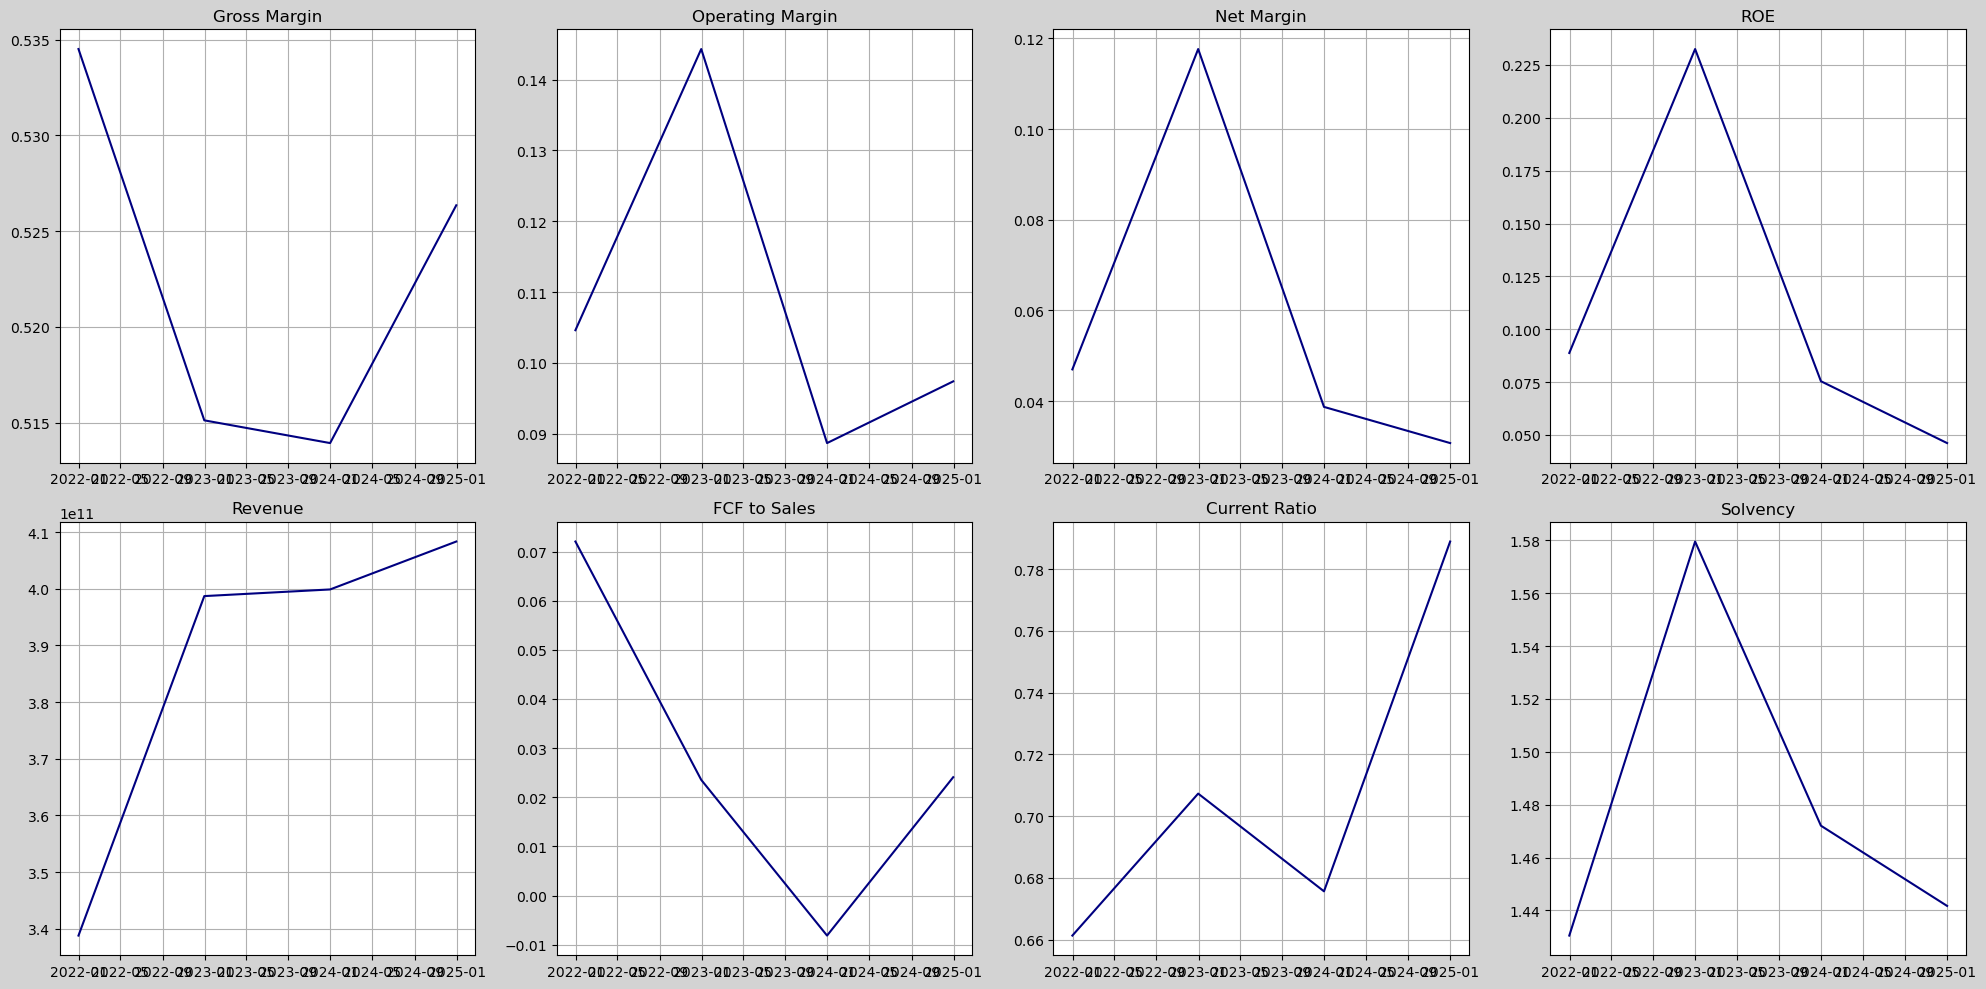

YF.download() has changed argument auto_adjust default to True


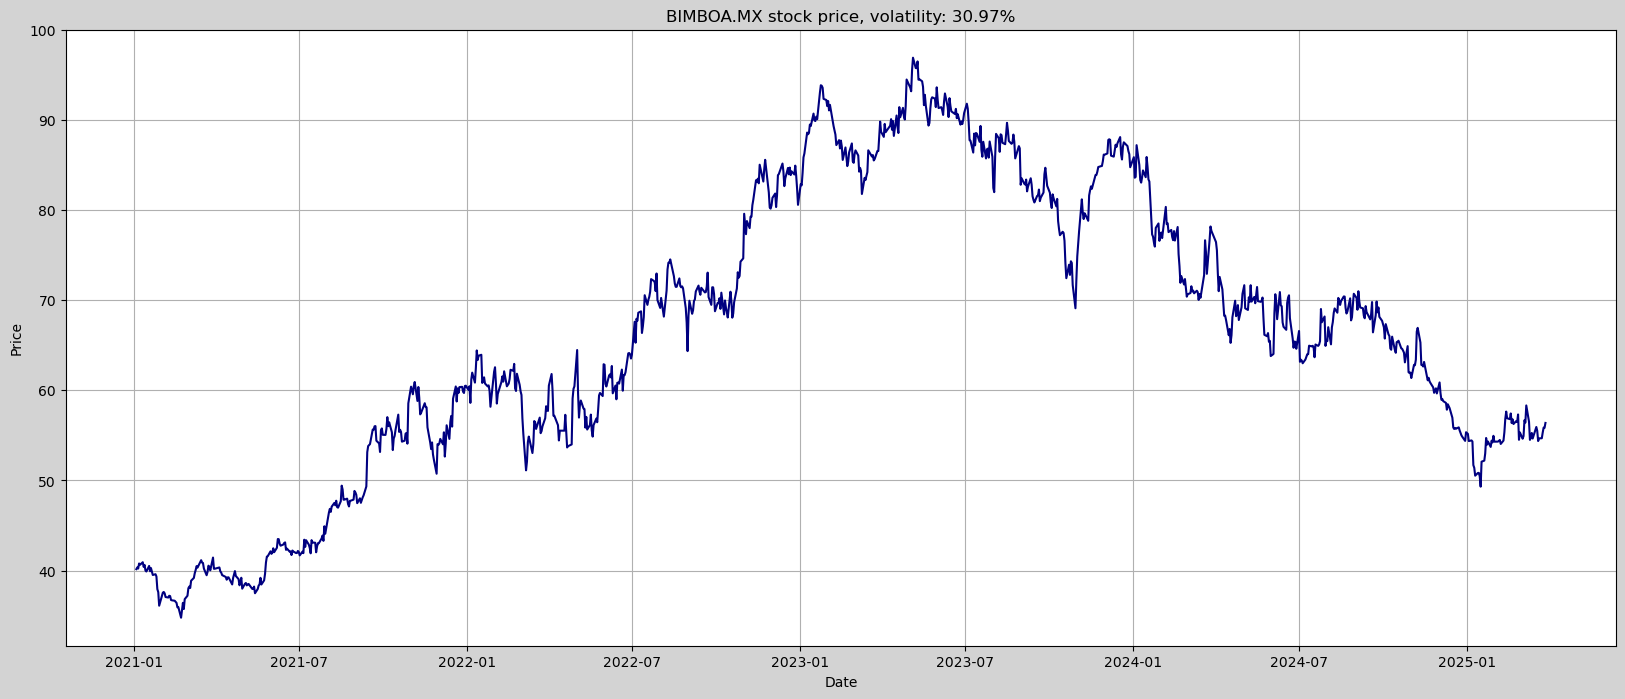

In [3]:
ticker = 'BIMBOA.MX'

bs, ist, cf = get_financials(ticker)

gross_margin = ist.loc['Gross Profit']/ist.loc['Total Revenue']

operating_margin = ist.loc['Operating Income']/ist.loc['Total Revenue']

net_margin = ist.loc['Net Income Common Stockholders']/ist.loc['Total Revenue']

roe = ist.loc['Net Income Common Stockholders'] / bs.loc['Total Capitalization']

revenue = ist.loc['Total Revenue']

fcf_to_sales = cf.loc['Free Cash Flow'] / ist.loc['Total Revenue']

current_ratio = bs.loc['Current Assets']/bs.loc['Current Liabilities']

solvency = bs.loc['Total Assets']/bs.loc['Total Liabilities Net Minority Interest']

eps = ist.loc['Net Income Common Stockholders'] / bs.loc['Common Stock Equity']

df_multiplos = pd.DataFrame({
    'Gross Margin': gross_margin,
    'Operating Margin': operating_margin,
    'Net Margin': net_margin,
    'ROE': roe,
    'Revenue': revenue,
    'FCF to Sales': fcf_to_sales,
    'Current Ratio': current_ratio,
    'Solvency': solvency
})

df_multiplos.sort_index()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.ravel()  # Aplana la matriz de ejes para indexar con un solo número

for i, column in enumerate(df_multiplos.columns):
    axes[i].plot(df_multiplos.index, df_multiplos.iloc[:, i], c = 'navy')
    axes[i].set_title(column)
    axes[i].grid()
plt.tight_layout()
plt.show()

plot_prices(ticker)

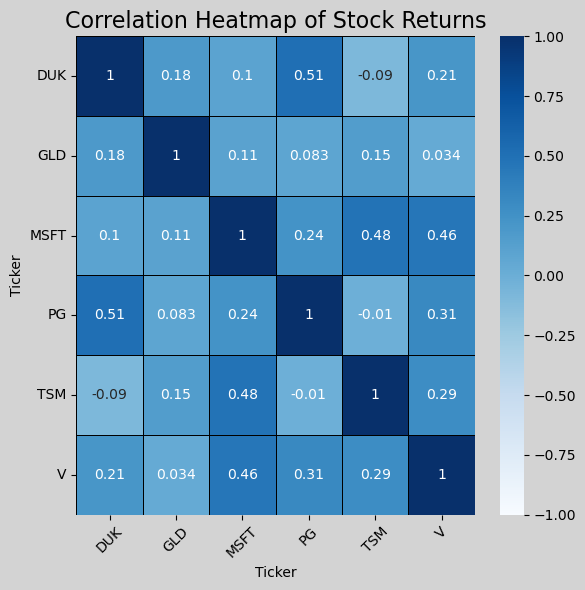

In [4]:
tickers = ['MSFT', 'PG', 'DUK', 'V', 'TSM', 'GLD']
data = yf.download(tickers, start='2021-01-01', progress=False)['Close']
rt = data.pct_change().dropna()
corr = rt.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr, 
            annot=True, 
            cmap='Blues', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5, 
            linecolor='black')

plt.title('Correlation Heatmap of Stock Returns', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()